# Dynamics of scalar-modulated system

Dynamics equation:

$\dot{x}(x, t) = a(t)b(x) + c(x); \;\; x(0) = 0$

Goal: stabilize arbitrary increasing trajectory $x^*(t); \;  x^*(0) = 0$.

## Sufficient conditions for stability

1. $dx^*/dt(t) \equiv v^*(t) = \dot{x}(x^*(t), t) = a(t)b(x^*(t)) + c(x^*(t))$ for all $t$.
2. $\dot{x}(x^*(t) + \Delta, t) = a(t)b(x^*(t) + \Delta) + c(x^*(t) + \Delta) \leq v^*(t)$... i.e. advanced trajectories slow down.
3. $\dot{x}(x^*(t) - \Delta, t) = a(t)b(x^*(t) - \Delta) + c(x^*(t) - \Delta) \geq v^*(t)$... i.e. delayed trajectories speed up.

## Candidate recipe for stabilizing through scalar modulation:

Choose $a(t)$ fluctuating approx on timescale of expected timing errors to correct.

Pick any $b(x^*(t))$ same sign as $da/dt(t)$ for all $t$.

Pick $c(x^*(t))$ s.t. $\dot{x}^*(t) = a(t)b(x^*(t)) + c(x^*(t))$ for all $t$.

# Diagram

Consider time $t$. For a constant speed attractor sequence, correct position is $x^*(t) = v^*t$.

Thus, 

$$\dot x(v^*t, t) = a(t)b(v^*t) + c(v^*t) = v^*.$$

For each $t$ we want to choose $b(x=v^*t)$ and $c(x=v^*t)$, given $a(t)$. The equation we have is:

$$c(v^*t) = v^* - a(t)b(v^*t)$$

Now plot $c$ vs $b$ for a few different a(t). Solutions for $b$ and $c$ are given on the line, whose sloped is -$a(t)$.

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as smooth
import sys

from aux import Generic, get_idx
from disp import set_font_size

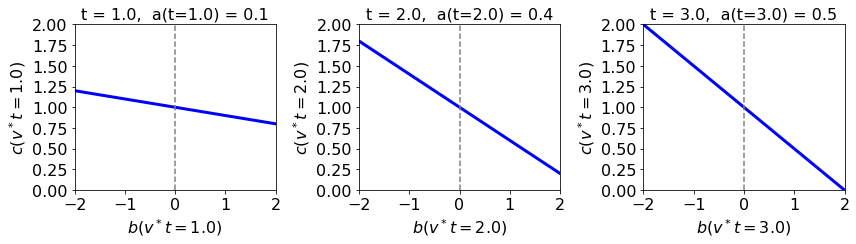

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)

v_star = 1
ts = np.array([1., 2., 3.])
a_ts = np.array([.1, .4, .5])

rb = np.linspace(-2, 2, 101)

for a_t, t, ax in zip(a_ts, ts, axs):
    ax.plot(rb, v_star - a_t*rb, c='b', lw=3)
    ax.set_xlabel(f'$b(v^*t={v_star*t})$')
    ax.set_ylabel(f'$c(v^*t={v_star*t})$')
    ax.set_title(f't = {t},  a(t={t}) = {a_t}')

for ax in axs:
    ax.set_xlim(-2, 2)
    ax.set_ylim(0, 2*v_star)
    ax.axvline(0, ls='--', color='gray')
    set_font_size(ax, 16)

To construct the functions $b(x)$ and $c(x)$, we loop over all $t$ and fill in $b(v^*t)$ and $c(v^*t)$ by choosing a solution on the line specified by $a(t)$. But which $b$ and $c$ do we choose at each $t$, since there are infinitely many solutions on the line?

To answer this we consider the stabilization criteria. If at time $t$ a sequence is not at the target position $x^*(t) \equiv v^*t$, i.e. its true position $x(t) \neq v^*t$, then it should increase its speed to $v(t) > v^*$ if $x(t) < v^*t$ (to catch up) and decrease its speed to $v(t) < v^*$ if $x(t) > v^*t$ (to slow down). Its speed at $t$ is given by $v(t) \equiv \dot x(x(t), t) = a(t)b(x(t)) + c(x(t))$. I.e. it feels the $b$ and $c$ at different position modulated by $a(t)$.

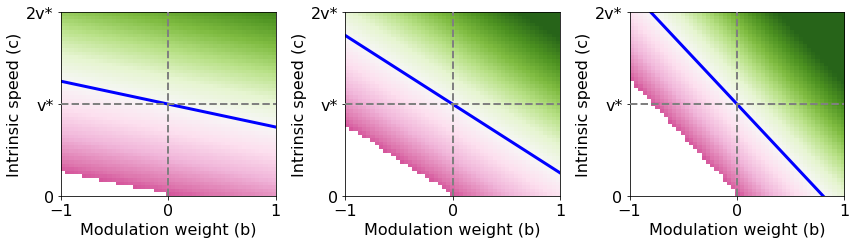

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)

for a_t, label, ax in zip([.25, .75, 1.25], ['b', 'c', 'd'], axs):

    r2b = np.tile(np.linspace(-1, 1, 51)[:, None], (1, 51))
    r2c = np.tile(np.linspace(0, 2, 51)[None, :], (51, 1))

    v_t = a_t*r2b + r2c
    v_t[v_t < 0] = np.nan

    ax.matshow(v_t.T, origin='lower', extent=[-1, 1, 0, 2], vmin=-.5, vmax=2.5, cmap='PiYG')
    ax.plot([-1, 1], 1 - a_t*np.array([-1, 1]), lw=3, c='b')
    ax.xaxis.tick_bottom()
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(['0', 'v*', '2v*'])
    ax.set_ylim(0, 2)
    ax.set_xlabel('Modulation weight (b)')
    ax.set_ylabel('Intrinsic speed (c)')
    ax.set_aspect('auto')

    ax.axvline(0, lw=2, ls='--', color='gray', zorder=10)
    ax.axhline(1, lw=2, ls='--', color='gray', zorder=10)

    set_font_size(ax, 16)

fig.savefig(f'ms/2b.svg')

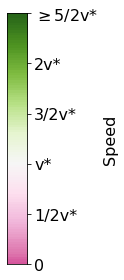

In [4]:
v = np.linspace(0, 2.5, 101)[:, None]

fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.matshow(v, origin='lower', extent=[0, .2, 0, 2.5], vmin=-.5, vmax=2.5, cmap='PiYG')
ax.xaxis.set_visible(False)
ax.set_yticks([0, .5, 1, 1.5, 2, 2.5])
ax.set_yticklabels(['0', '1/2v*', 'v*', '3/2v*', '2v*', '$\geq$5/2v*'])
ax.set_ylabel('Speed')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

set_font_size(ax, 16)

fig.savefig('ms/2bCB.svg')

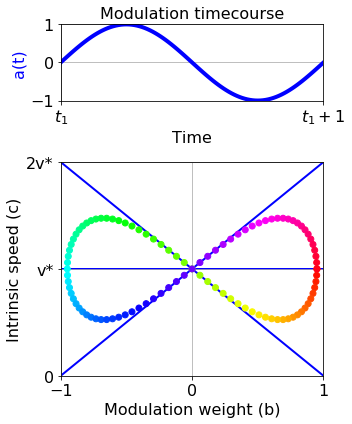

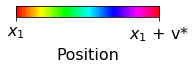

In [5]:
t = np.linspace(0, 1, 101)
a = np.sin(2*np.pi*t)

gs = gridspec.GridSpec(3, 1)

fig = plt.figure(figsize=(5, 6), tight_layout=True)
axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1:])]

axs[0].plot(t, a, lw=4, c='b')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(-1, 1)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['$t_1$', '$t_1 + 1$'])
axs[0].set_xlabel('Time')
axs[0].set_ylabel('a(t)', color='b')
axs[0].set_title('Modulation timecourse')
axs[0].grid()

b_1 = .95*np.cos(2*np.pi*t)
c_1 = 1 - a*b_1

axs[1].scatter(b_1, c_1, c=t, cmap='hsv', vmin=0, vmax=1, zorder=100)

axs[1].plot([-1, 1], [2, 0], lw=2, c='b', zorder=0)
axs[1].plot([-1, 1], [0, 2], lw=2, c='b', zorder=0)
axs[1].plot([-1, 1], [1, 1], lw=2, c='b', zorder=0)
axs[1].set_xlim(-1, 1)
axs[1].set_ylim(0, 2)
axs[1].set_xticks([-1, 0, 1])
axs[1].set_yticks([0, 1, 2])
axs[1].set_yticklabels(['0', 'v*', '2v*'])

axs[1].set_xlabel('Modulation weight (b)')
axs[1].set_ylabel('Intrinsic speed (c)')
axs[1].grid()

for ax in axs:
    set_font_size(ax, 16)
    
fig.savefig('ms/2d.svg')

fig, ax = plt.subplots(1, 1, figsize=(4, 1), tight_layout=True)

r2t = np.linspace(0, 1, 101)[None, :]
ax.matshow(r2t, extent=[0, 1, 0, .075], cmap='hsv', vmin=0, vmax=1)
ax.set_xlabel('Position')
ax.set_xticks([0, 1])
ax.set_xticklabels(['$x_1$', '$x_1$ + v*'])
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)

set_font_size(ax, 16)

fig.savefig('ms/2dCB.svg')

# Example

In [6]:
DT = .001
DX = .001

# funcs for getting nearest value
def a(t_samp):
    return a_arr[get_idx(t_samp, 0, DT, len(t))]

def b(x_samp):
    return b_arr[get_idx(x_samp, 0, DX, len(x))]

def c(x_samp):
    return c_arr[get_idx(x_samp, 0, DX, len(x))]

# simulation start times and positions
T_0_X_0 = [
    (0, 0),
    (.5, 0),
    (0, .5),
    (1, 0),
    (0, 1),
    (1.5, 0),
    (0, 1.5),
    (2, 0),
    (0, 2),
    (2.5, 0),
    (0, 2.5),
    (3, 0),
    (0, 3),
]

Sinusoidal modulation:

$x^*(t) = t$

$a(t) = 1 + cos(t)$

$b(x) = -sin(x)$

$c(x) = [1 + sin(x)]cos(x)$

In [7]:
T_MAX = 16
X_MAX = 16

T_STOP = 14

np.random.seed(1)

t = np.arange(0, T_MAX, DT)
x = np.arange(0, X_MAX, DX)

a_arr = 1 + np.cos(t)
b_arr = -.75*np.sin(x)
c_arr = 1 - a_arr*b_arr

# run simulations
smln = []

for _t_0, _x_0 in T_0_X_0:
    sys.stdout.write(f' t_0 {_t_0:.2f} x_0 {_x_0:.2f},')

    t_trl = np.arange(_t_0, T_STOP, DT)
    x_trl = np.nan * np.zeros(len(t_trl))

    x_trl[0] = _x_0

    for ct, _t in enumerate(t_trl[1:], 1):

        _x = x_trl[ct-1]

        _v = a(_t)*b(_x) + c(_x)
        x_trl[ct] = _x + _v*DT
        
    smln.append((t_trl.copy(), x_trl.copy()))

 t_0 0.00 x_0 0.00, t_0 0.50 x_0 0.00, t_0 0.00 x_0 0.50, t_0 1.00 x_0 0.00, t_0 0.00 x_0 1.00, t_0 1.50 x_0 0.00, t_0 0.00 x_0 1.50, t_0 2.00 x_0 0.00, t_0 0.00 x_0 2.00, t_0 2.50 x_0 0.00, t_0 0.00 x_0 2.50, t_0 3.00 x_0 0.00, t_0 0.00 x_0 3.00,

Min: 0.026, Max: 1.974, Std: 0.458


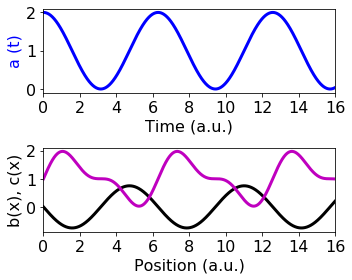

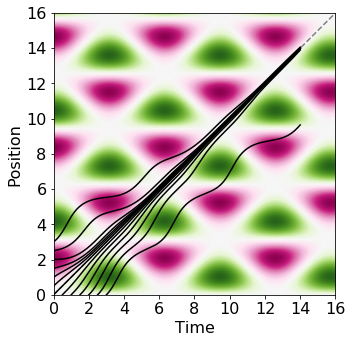

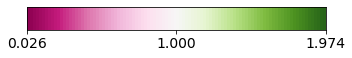

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(5, 4), tight_layout=True)

# plot modulation time course
axs[0].plot(t, a(t), c='b', lw=3)
axs[0].set_xlim(0, T_MAX)

axs[0].set_xlabel('Time (a.u.)')
axs[0].set_ylabel('a (t)', color='b')

# plot modulation spatial profile
axs[1].plot(x, b(x), c='k', lw=3)
axs[1].plot(x, c(x), c='m', lw=3)
axs[1].set_xlim(0, X_MAX)
axs[1].set_xlabel('Position (a.u.)')
axs[1].set_ylabel('b(x), c(x)')

#axs[1].legend(['b(x)', 'c(x)'])

for ax in axs:
    set_font_size(ax, 16)
    
fig.savefig('ms/2e_top.svg')
    
# plot speed landscape and trajectories
fig, ax = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)

t2v = b_arr[:, None] @ a_arr[None, :] + np.tile(c_arr[:, None], (1, len(t)))
v_diff_u = t2v.max() - 1
v_diff_l = 1 - t2v.min()

if v_diff_u > v_diff_l:
    v_min = 1 - v_diff_u
    v_max = 1 + v_diff_u
else:
    v_min = 1 - v_diff_l
    v_max = 1 + v_diff_l

ax.imshow(t2v, origin='lower', cmap='PiYG', vmin=v_min, vmax=v_max, extent=[0, T_MAX, 0, X_MAX])

ax.plot([0, T_MAX], [0, T_MAX], c='gray', ls='--')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
print('Min: {0:.3f}, Max: {1:.3f}, Std: {2:.3f}'.format(v_min, v_max, t2v.std()))


for t_trl, x_trl in smln:
    
    ax.plot(t_trl, x_trl, c='k')

set_font_size(ax, 16)

fig.savefig('ms/2e_bottom.svg')

fig, ax = plt.subplots(1, 1, figsize=(5, 1), tight_layout=True)
ax.matshow(np.linspace(v_min, v_max, 100)[None, :], origin='lower', vmin=v_min, vmax=v_max, cmap='PiYG',
           extent=[v_min, v_max, 0, .15])
ax.set_xticks([v_min, 1, v_max])
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)

set_font_size(ax, 14)

fig.savefig('ms/2e_cbar.svg')

In [9]:
T_MAX = 16
X_MAX = 16

T_STOP = 14

np.random.seed(1)

t = np.arange(0, T_MAX, DT)
x = np.arange(0, X_MAX, DX)

a_arr = smooth(np.random.normal(0, 1, len(t)), .9/DT)
a_arr -= a_arr.min()
a_arr /= (.5*a_arr.max())

b_arr = .65*np.gradient(a_arr, DT)
c_arr = 1 - a_arr*b_arr

# run simulations
smln = []

for _t_0, _x_0 in T_0_X_0:
    sys.stdout.write(f' t_0 {_t_0:.2f} x_0 {_x_0:.2f},')

    t_trl = np.arange(_t_0, T_STOP, DT)
    x_trl = np.nan * np.zeros(len(t_trl))

    x_trl[0] = _x_0

    for ct, _t in enumerate(t_trl[1:], 1):

        _x = x_trl[ct-1]

        _v = a(_t)*b(_x) + c(_x)
        x_trl[ct] = _x + _v*DT
        
    smln.append((t_trl.copy(), x_trl.copy()))

 t_0 0.00 x_0 0.00, t_0 0.50 x_0 0.00, t_0 0.00 x_0 0.50, t_0 1.00 x_0 0.00, t_0 0.00 x_0 1.00, t_0 1.50 x_0 0.00, t_0 0.00 x_0 1.50, t_0 2.00 x_0 0.00, t_0 0.00 x_0 2.00, t_0 2.50 x_0 0.00, t_0 0.00 x_0 2.50, t_0 3.00 x_0 0.00, t_0 0.00 x_0 3.00,

Min: 0.016, Max: 1.984, Std: 0.225


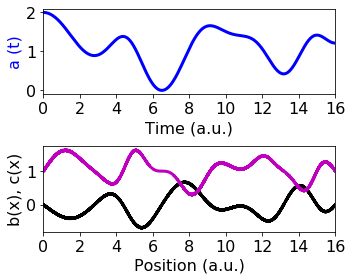

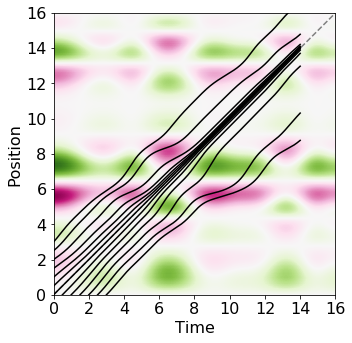

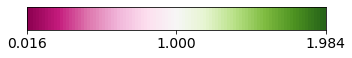

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(5, 4), tight_layout=True)

# plot modulation time course
axs[0].plot(t, a(t), c='b', lw=3)
axs[0].set_xlim(0, T_MAX)

axs[0].set_xlabel('Time (a.u.)')
axs[0].set_ylabel('a (t)', color='b')

# plot modulation spatial profile
axs[1].plot(x, b(x), c='k', lw=3)
axs[1].plot(x, c(x), c='m', lw=3)
axs[1].set_xlim(0, X_MAX)
axs[1].set_xlabel('Position (a.u.)')
axs[1].set_ylabel('b(x), c(x)')

for ax in axs:
    set_font_size(ax, 16)
    
fig.savefig('ms/2f_top.svg')
    
# plot speed landscape and trajectories
fig, ax = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)

t2v = b_arr[:, None] @ a_arr[None, :] + np.tile(c_arr[:, None], (1, len(t)))
v_diff_u = t2v.max() - 1
v_diff_l = 1 - t2v.min()

if v_diff_u > v_diff_l:
    v_min = 1 - v_diff_u
    v_max = 1 + v_diff_u
else:
    v_min = 1 - v_diff_l
    v_max = 1 + v_diff_l

ax.imshow(t2v, origin='lower', cmap='PiYG', vmin=v_min, vmax=v_max, extent=[0, T_MAX, 0, X_MAX])

ax.plot([0, T_MAX], [0, T_MAX], c='gray', ls='--')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
print('Min: {0:.3f}, Max: {1:.3f}, Std: {2:.3f}'.format(v_min, v_max, t2v.std()))


for t_trl, x_trl in smln:
    
    ax.plot(t_trl, x_trl, c='k')

ax.set_xlim(0, T_MAX)
ax.set_ylim(0, X_MAX)
set_font_size(ax, 16)

fig.savefig('ms/2f_bottom.svg')

fig, ax = plt.subplots(1, 1, figsize=(5, 1), tight_layout=True)
ax.matshow(np.linspace(v_min, v_max, 100)[None, :], origin='lower', vmin=v_min, vmax=v_max, cmap='PiYG',
           extent=[v_min, v_max, 0, .15])
ax.set_xticks([v_min, 1, v_max])
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)

set_font_size(ax, 14)

fig.savefig('ms/2f_cbar.svg')